In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

data = yf.download(tickers = ('btc-cad'), 
                   period = '1y', 
                   interval = '1d',
                   auto_adjust = True)
df = pd.DataFrame(data)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2021-01-18,45712.234375,47679.492188,44586.644531,46701.332031,63124697454
2021-01-19,46716.832031,48073.707031,45888.945312,45888.945312,72827553846
2021-01-20,45863.890625,46274.687500,42417.207031,44892.292969,84403577912
2021-01-21,44894.375000,44877.082031,38235.890625,38992.074219,95682504823
2021-01-22,38981.859375,43016.281250,36645.445312,42028.714844,98313810634
...,...,...,...,...,...
2022-01-14,53284.757812,54428.312500,52469.832031,54076.761719,29582332271
2022-01-15,54079.523438,54860.910156,53536.410156,54174.246094,23050346996
2022-01-16,54167.527344,54499.726562,53564.000000,54073.082031,22452667900


In [2]:
df['SMA'] = df.Close.rolling(window=10).mean()

df['stddev'] = df.Close.rolling(window=10).std()

df['Upper'] = df.SMA + 2 * df.stddev
df['Lower'] = df.SMA - 2 * df.stddev

## Generate the Buy_signal and Sell_signal based on the strategy
df['Buy_signal'] = np.where(df.Close < df.Lower, True, False)
df['Sell_signal'] = np.where(df.Close > df.Upper, True, False)

## Remove nan value
df = df.dropna()
df

,Open,High,Low,Close,Volume,SMA,stddev,Upper,Lower,Buy_signal,Sell_signal
Date,,,,,,,,,,,
2021-01-27,41333.847656,41333.847656,37628.261719,39009.808594,80213709506,42201.202344,2715.886455,47632.975254,36769.429434,False,False
2021-01-28,39020.695312,43411.433594,38501.851562,42939.410156,98177022573,41825.010156,2242.591038,46310.192233,37339.828080,False,False
2021-01-29,44033.328125,49034.347656,41269.437500,43844.332031,150628000568,41620.548828,1897.570921,45415.690671,37825.406985,False,False
2021-01-30,43818.203125,44506.566406,42086.031250,43794.734375,83248000113,41510.792969,1709.752685,44930.298339,38091.287598,False,False
2021-01-31,43796.468750,43818.773438,41242.898438,42390.847656,67532936483,41850.670312,1475.152505,44800.975323,38900.365302,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-01-14,53284.757812,54428.312500,52469.832031,54076.761719,29582332271,53788.185156,1064.509627,55917.204409,51659.165903,False,False
2022-01-15,54079.523438,54860.910156,53536.410156,54174.246094,23050346996,53645.926172,873.948633,55393.823438,51898.028906,False,False
2022-01-16,54167.527344,54499.726562,53564.000000,54073.082031,22452667900,53558.524609,766.456528,55091.437665,52025.611553,False,False


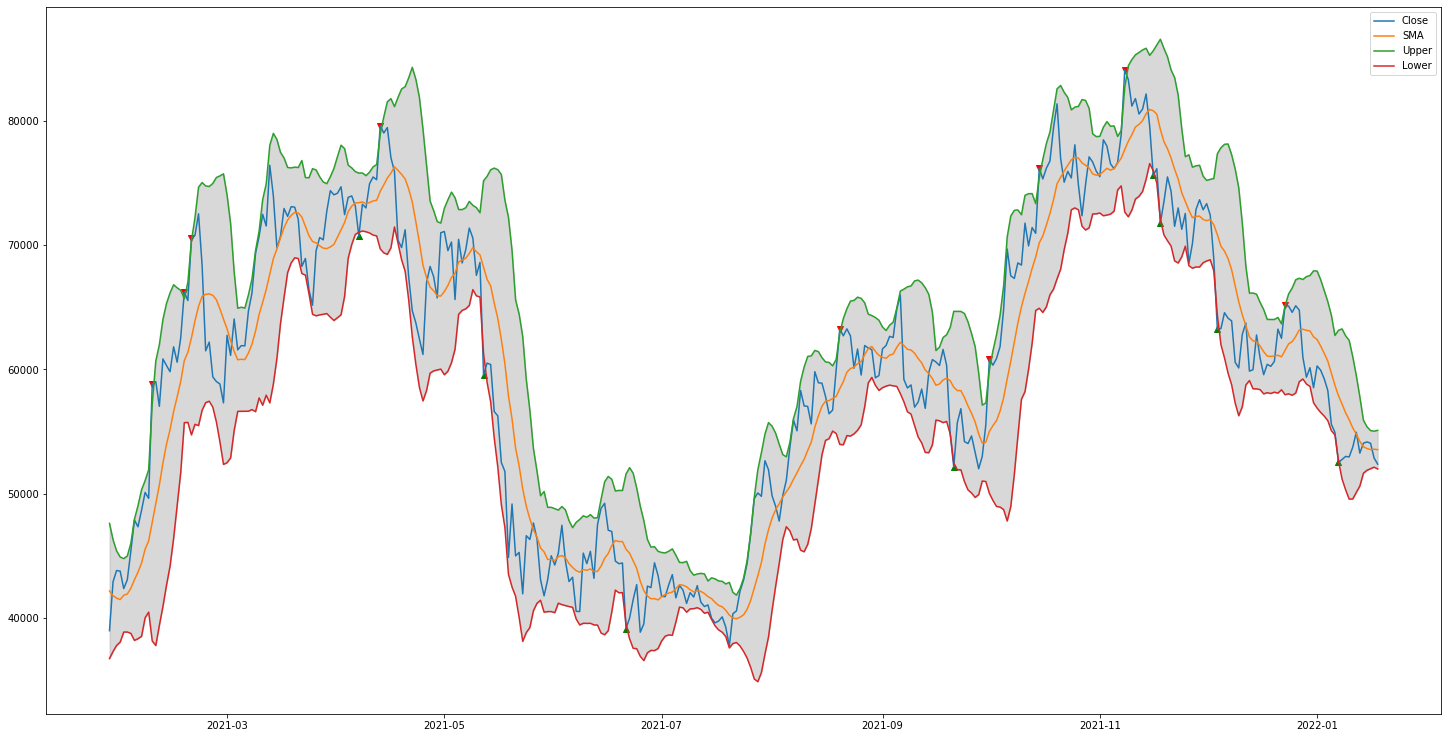

In [3]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.index[df.Buy_signal], df[df.Buy_signal].Close, marker='^', color = 'g')
plt.scatter(df.index[df.Sell_signal], df[df.Sell_signal].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

In [4]:
## Define new lists and stock_on_hand

buy = []
sell = []
stock_on_hand = False

## change multiple buy and sell to only 1 buy and 1 sell

for i in range(len(df)):
    if df.Close[i] < df.Lower[i]:
        if stock_on_hand == False:
            buy.append(i)
            stock_on_hand = True
    elif df.Close[i] > df.Upper[i]:
        if stock_on_hand == True:
            sell.append(i)
            stock_on_hand = False

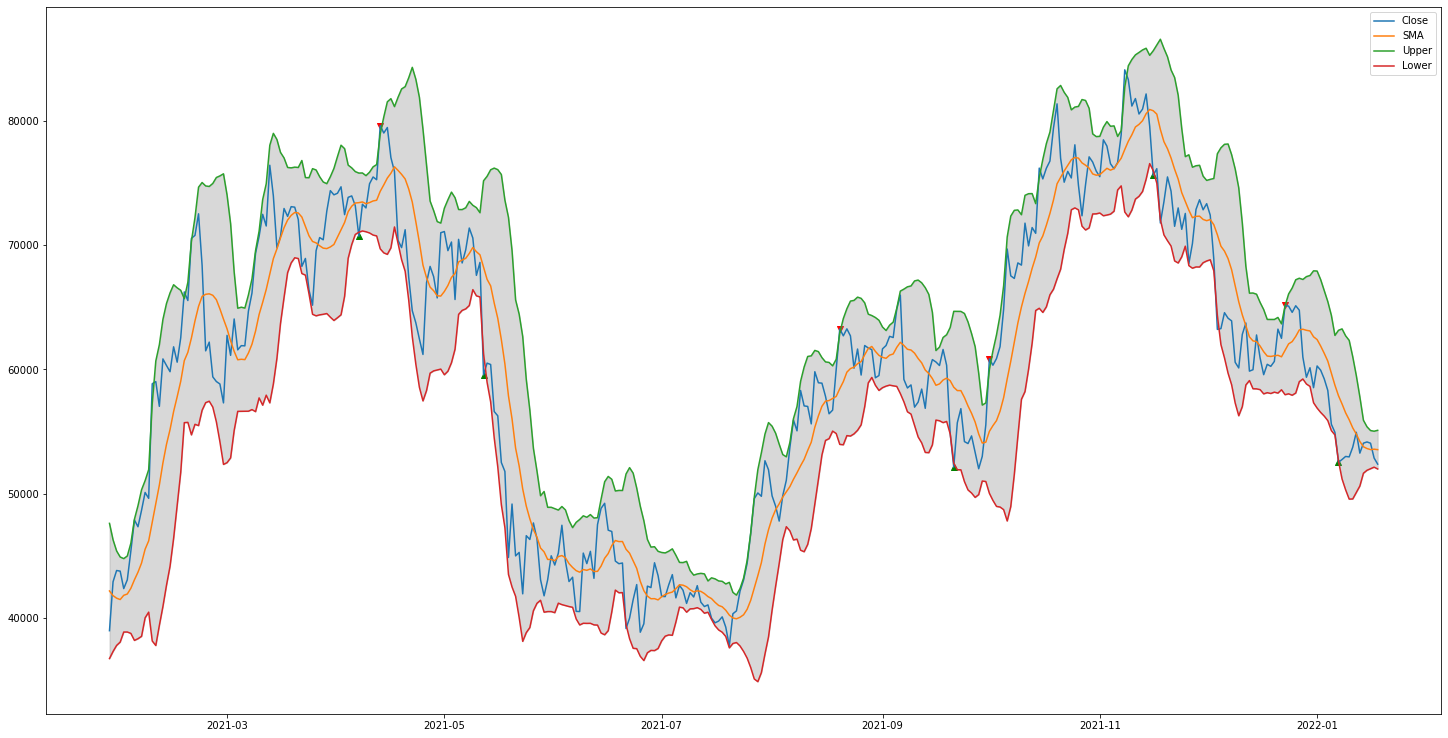

In [5]:
## plot figure size 
plt.figure(figsize= (25,13))

## plot 4 lines
plt.plot(df[['Close', 'SMA', 'Upper', 'Lower']])

## plot Buy and Sell scatter to our visualization
plt.scatter(df.iloc[buy].index, df.iloc[buy].Close, marker='^', color = 'g')
plt.scatter(df.iloc[sell].index, df.iloc[sell].Close, marker='v', color = 'r')

## Fill the middle area with grey color
plt.fill_between(df.index, df.Upper, df.Lower, color = 'grey', alpha = 0.3)

## show plot legend
plt.legend(['Close', 'SMA', 'Upper', 'Lower'])

## show plot
plt.show()

In [6]:
share = 1000
profit = 0

for i in range(len(sell)):
    
    profit = profit - (df.iloc[buy[i]].Close * share)
    profit = profit + (df.iloc[sell[i]].Close * share)
    
profit

10810730.46875